<a href="https://colab.research.google.com/github/Lizethmurcia29/TIC_lizeth/blob/main/An%C3%A1lisis_de_sentimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=1ddc43a93249f38c60a32ae0bc3503d0d1b37d66e988c3f48feefc6d3e320eee
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succ

In [13]:
import pandas as pd
from textblob import TextBlob
from googletrans import Translator
from wordcloud import WordCloud, STOPWORDS

In [3]:
def translateComment(strComment:str):
  translator = Translator()
  strEngComment = translator.translate(strComment, src="es", dest="en")
  return strEngComment.text

def getPolarity(strComment:str):
  strComment = translateComment(strComment)
  analysis = TextBlob(strComment)
  return analysis.sentiment.polarity

# Se carga el dataset
df = pd.read_csv('/content/Comentarios.csv')
df['polaridad'] = df['Comentario'].apply(getPolarity)

df.to_csv('resultados.csv', index = False)

In [4]:
df = pd.read_csv('/content/resultados.csv')
display(df)

,Comentario,polaridad
0,La comida fue excelente y el servicio fue exce...,0.555556
1,El ambiente era agradable y la comida estaba d...,0.261458
2,"La comida estaba bien, pero el servicio fue le...",0.200000
3,"No me gustó la comida, estaba fría y el sabor ...",-0.475000
4,El peor restaurante en el que he estado. No lo...,-1.000000
...,...,...
66,Siempre disfruto venir aquí. La comida es deli...,0.629167
67,"Buen lugar para cenar, aunque el servicio pued...",0.070833
68,"La comida está bien, pero el ambiente no es mu...",0.208974
69,No me gustó la comida y el servicio fue muy de...,-0.520000


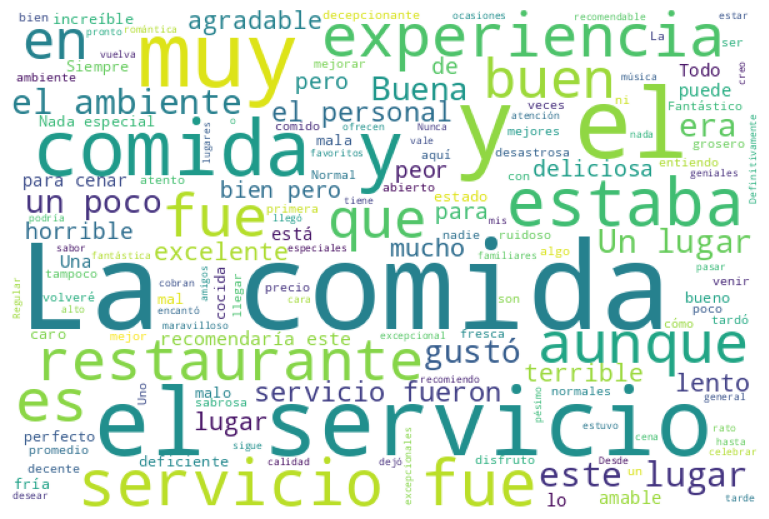

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combinar todos los comentarios en una sola cadena
text = " ".join(review for review in df.Comentario)

# Crear la nube de palabras
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [6]:
positivos = df[df['polaridad'] > 0].shape[0]
negativos = df[df['polaridad'] < 0].shape[0]
neutros = df[df['polaridad'] == 0].shape[0]

print(f"Comentarios positivos: {positivos}")
print(f"Comentarios negativos: {negativos}")
print(f"Comentarios neutros: {neutros}")

Comentarios positivos: 43
Comentarios negativos: 28
Comentarios neutros: 0


Si defino que los parametros de comentarios

negativos van de -1 a -0.5
positivos 0.5 a 1
neutral la diferencia entre positivo y negativo (-0,5 y 0,5)

In [10]:
positivos = df[df[ 'polaridad'] > 0].shape[0]
negativos = df[df['polaridad'] < 0].shape[0]
neutros = df[df[ 'polaridad'] == 0].shape[0]

print(f"Comentarios positivos: (positivos)")
print(f"Comentarios negativos: (negativos)")
print (f"Comentarios neutros: {neutros}")


# Definir las categorías de comentarios según la polaridad
negative_comments = df[(df['polaridad'] >= -1) & (df['polaridad'] <= -0.5)]
positive_comments = df[(df['polaridad'] >= 0.5) & (df['polaridad'] <= 1)]
neutral_comments = df[(df['polaridad'] > -0.5) & (df['polaridad'] < 0.5)]

# Contar la cantidad de comentarios en cada categoría
categories_count = {
    'Categoría': ['Negativos', 'Neutrales', 'Positivos'],
    'Cantidad': [len(negative_comments), len(neutral_comments), len(positive_comments)]
}

# Crear un df
categories_df = pd.DataFrame(categories_count)
total_comments = categories_df['Cantidad'].sum() # Calcular el total de comentarios

categories_df['Porcentaje'] = round((categories_df['Cantidad'] / total_comments) * 100, 2) # % de comentarios
categories_df = categories_df.sort_values(by='Cantidad', ascending=False).reset_index(drop=True) # organizar descendente

print(categories_df)

Comentarios positivos: (positivos)
Comentarios negativos: (negativos)
Comentarios neutros: 0
   Categoría  Cantidad  Porcentaje
0  Neutrales        33       46.48
1  Positivos        20       28.17
2  Negativos        18       25.35


Teniendo en cuenta los datos otorgados, se evidencia que hay una aumento de comentarios neutrales a diferencia de las otras categorias

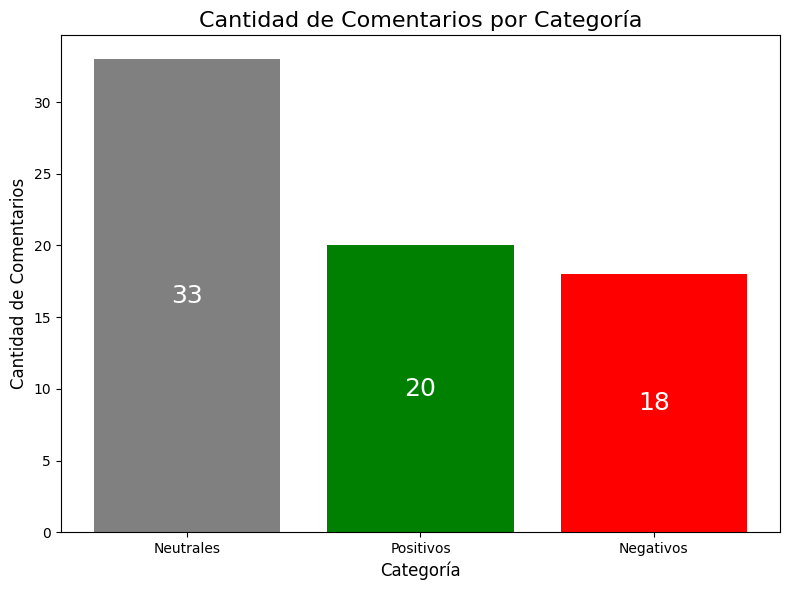

In [19]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico

# Excluir la fila 'Total' del gráfico
df_to_plot = categories_df[categories_df['Categoría'] != 'Total']

# Definir los colores para cada categoría
colors = ['red' if cat == 'Negativos' else 'gray' if cat == 'Neutrales' else 'green' for cat in df_to_plot['Categoría']]

# Graficar
bars = plt.bar(df_to_plot['Categoría'], df_to_plot['Cantidad'], color=colors)

# Añadir títulos y etiquetas
plt.title('Cantidad de Comentarios por Categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Cantidad de Comentarios', fontsize=12)

# Mostrar los valores dentro de las barras, en el centro y con tamaño de letra grande
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval / 2, str(int(yval)), ha='center', va='center', fontsize=18, color='white')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

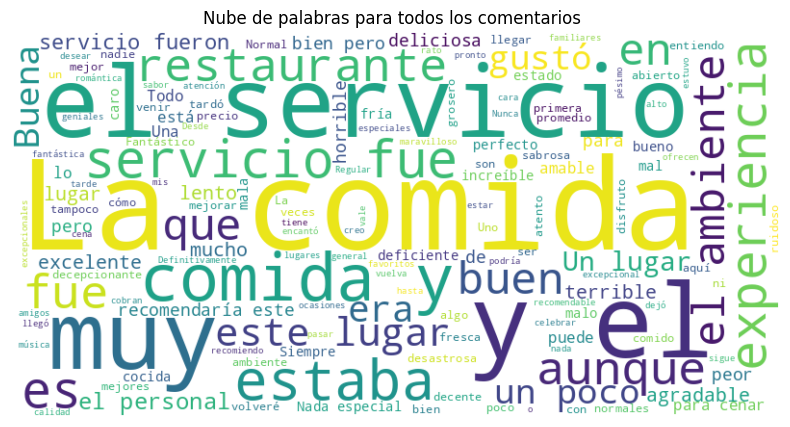

In [21]:
# Concatenamos todos los comentarios en un solo string
all_comments = " ".join(comment for comment in df['Comentario'])

# Generamos la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Quitamos los ejes
plt.title("Nube de palabras para todos los comentarios ")
plt.show()